In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
## you will need to use the properties_2017 and predictions_2017 tables.

## square feet of the house ("living square feet"), number of bedrooms, number of bathrooms, the assess value of the house by the tax appraisal district ('taxvaluedollarcnt'...this will be your target variable in the project), and 2-3 other variables

## may, june, july or august (date is in predictions_2017 table)

## single unit property values

In [4]:
sql = '''
select parcelid, calculatedfinishedsquarefeet as square_feet, bedroomcnt as bedrooms, bathroomcnt as bathrooms, taxamount as taxes, yearbuilt, regionidcounty as county, lotsizesquarefeet as lot_size, taxvaluedollarcnt as tax_value
from properties_2017
join predictions_2017 using(parcelid)
where transactiondate between "2017-05-01" and "2017-08-31"
AND propertylandusetypeid > 250
AND propertylandusetypeid < 280 
AND propertylandusetypeid != 270 
AND propertylandusetypeid != 271
AND taxvaluedollarcnt < 1200000
OR  unitcnt = 1;
'''

In [5]:
df = pd.read_sql(sql, get_connection('zillow'))

In [6]:
df.head()

,parcelid,square_feet,bedrooms,bathrooms,taxes,yearbuilt,county,lot_size,tax_value
0,12177905,2376.0,4.0,3.0,1777.51,1970.0,3101.0,13038.0,145143.0
1,10887214,1312.0,3.0,3.0,1533.89,1964.0,3101.0,278581.0,119407.0
2,12095076,2962.0,4.0,3.0,9516.26,1950.0,3101.0,63000.0,773303.0
3,12069064,738.0,2.0,1.0,2366.08,1922.0,3101.0,4214.0,218552.0
4,12790562,3039.0,4.0,3.0,3104.19,1970.0,3101.0,20028.0,220583.0


In [7]:
df.shape

(61299, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61299 entries, 0 to 61298
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   parcelid     61299 non-null  int64  
 1   square_feet  61210 non-null  float64
 2   bedrooms     61299 non-null  float64
 3   bathrooms    61299 non-null  float64
 4   taxes        61295 non-null  float64
 5   yearbuilt    61186 non-null  float64
 6   county       61299 non-null  float64
 7   lot_size     56346 non-null  float64
 8   tax_value    61299 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 4.2 MB


In [9]:
print(df.isnull().sum())

parcelid          0
square_feet      89
bedrooms          0
bathrooms         0
taxes             4
yearbuilt       113
county            0
lot_size       4953
tax_value         0
dtype: int64


In [10]:
print(df.columns[df.isnull().any()])

Index(['square_feet', 'taxes', 'yearbuilt', 'lot_size'], dtype='object')


In [11]:
df.to_csv("zillow.csv") 

In [12]:
df = df.dropna()

## drop rows with null values

In [13]:
df.shape

(56274, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56274 entries, 0 to 61298
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   parcelid     56274 non-null  int64  
 1   square_feet  56274 non-null  float64
 2   bedrooms     56274 non-null  float64
 3   bathrooms    56274 non-null  float64
 4   taxes        56274 non-null  float64
 5   yearbuilt    56274 non-null  float64
 6   county       56274 non-null  float64
 7   lot_size     56274 non-null  float64
 8   tax_value    56274 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 4.3 MB


In [15]:
print(df.isnull().sum())

parcelid       0
square_feet    0
bedrooms       0
bathrooms      0
taxes          0
yearbuilt      0
county         0
lot_size       0
tax_value      0
dtype: int64


In [16]:
df = df.set_index("parcelid")

df.head()

,square_feet,bedrooms,bathrooms,taxes,yearbuilt,county,lot_size,tax_value
parcelid,,,,,,,,
12177905,2376.0,4.0,3.0,1777.51,1970.0,3101.0,13038.0,145143.0
10887214,1312.0,3.0,3.0,1533.89,1964.0,3101.0,278581.0,119407.0
12095076,2962.0,4.0,3.0,9516.26,1950.0,3101.0,63000.0,773303.0
12069064,738.0,2.0,1.0,2366.08,1922.0,3101.0,4214.0,218552.0
12790562,3039.0,4.0,3.0,3104.19,1970.0,3101.0,20028.0,220583.0


In [17]:
df['house_age'] = (2021 - df.yearbuilt).astype('int')

df.head()

,square_feet,bedrooms,bathrooms,taxes,yearbuilt,county,lot_size,tax_value,house_age
parcelid,,,,,,,,,
12177905,2376.0,4.0,3.0,1777.51,1970.0,3101.0,13038.0,145143.0,51
10887214,1312.0,3.0,3.0,1533.89,1964.0,3101.0,278581.0,119407.0,57
12095076,2962.0,4.0,3.0,9516.26,1950.0,3101.0,63000.0,773303.0,71
12069064,738.0,2.0,1.0,2366.08,1922.0,3101.0,4214.0,218552.0,99
12790562,3039.0,4.0,3.0,3104.19,1970.0,3101.0,20028.0,220583.0,51


In [18]:
## remove outliers 

# Calculate the interquartile range for your column

q1, q3 = df.tax_value.quantile([.25, .75])

iqr = q3 - q1

In [19]:
# Create variables holding upper and lower cutoff values using common formula. Tweak as you like.

upperbound = q3 + 1.5 * iqr

lowerbound = q1 - 1.5 * iqr

In [20]:
upperbound

1088145.25

In [21]:
## upperbound = 1117983.5 before excluding extremes in SQL 

In [22]:
lowerbound

-346908.75

In [23]:
df.shape

(56274, 9)

<AxesSubplot:>

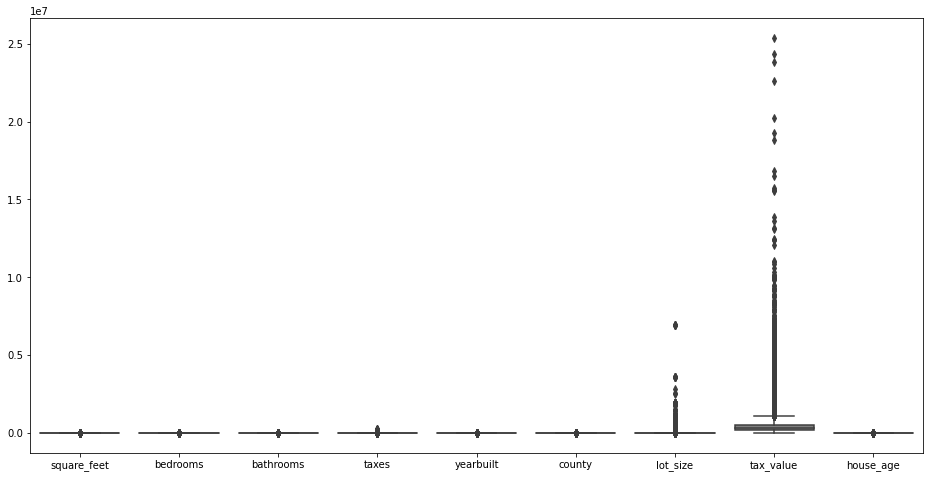

In [25]:
plt.figure(figsize=(16,8))

sns.boxplot(data=df)

<AxesSubplot:>

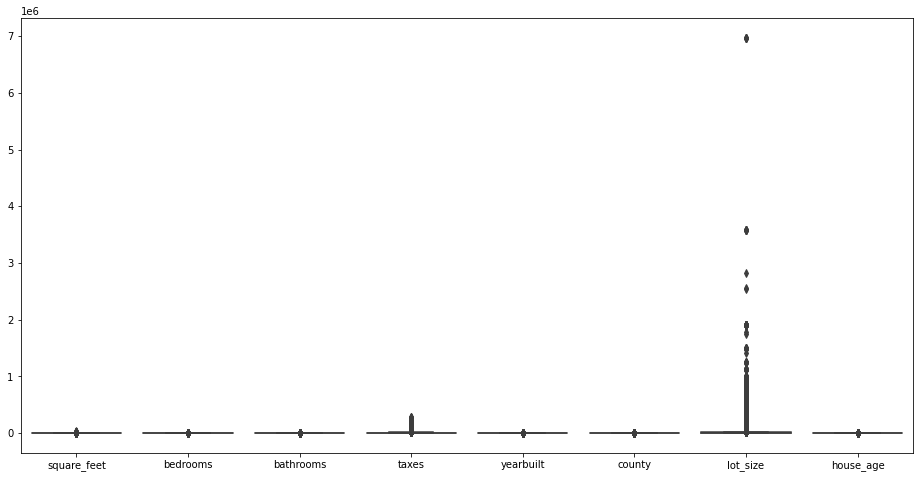

In [27]:
plt.figure(figsize=(16,8))

sns.boxplot(data=df.drop(columns=['tax_value']))

In [ ]:
def wrangle_zillow():
    data = pd.read_csv("zillow.csv")
    
    data['house_age'] = (2021 - data.yearbuilt)
    
    data = data.drop(columns = ['Unnamed: 0', 'yearbuilt'])
    
    data = data.set_index("parcelid")
    
    data = data.dropna()
    # remove all NaN values
    
    return data

In [ ]:
def split(df, stratify_by=None):
    """
    Crude train, validate, test split
    To stratify, send in a column name
    """
    
    if stratify_by == None:
        train, test = train_test_split(df, test_size=.2, random_state=319)
        train, validate = train_test_split(train, test_size=.3, random_state=319)
    else:
        train, test = train_test_split(df, test_size=.2, random_state=319, stratify=df[stratify_by])
        train, validate = train_test_split(train, test_size=.3, random_state=319, stratify=train[stratify_by])
    
    return train, validate, test

In [ ]:
df2 = wrangle_zillow()

In [ ]:
df2.head()

In [ ]:
df2.shape

In [ ]:
df2.info()

In [ ]:
df2.describe()

In [ ]:
train, validate, test = split(df2)

In [ ]:
train.shape

In [ ]:
train.info()

In [ ]:
validate.shape

In [ ]:
test.shape

In [ ]:
def scale_data(train, validate, test):
    
    '''
    This function will scale numeric data using Min Max transform after 
    it has already been split into train, validate, and test.
    '''
    
    # Make the thing
    scaler = sklearn.preprocessing.MinMaxScaler()
    
    # We fit on the training data
    # we only .fit on the training data
    scaler.fit(train)
    
    train_scaled = scaler.transform(train)
    validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)
    
    # turn the numpy arrays into dataframes
    train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
    validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
    test_scaled = pd.DataFrame(test_scaled, columns=train.columns)
    
    return train_scaled, validate_scaled, test_scaled

In [ ]:
X_train = train.drop(columns=['tax_value'])
y_train = train.tax_value

X_validate = validate.drop(columns=['tax_value'])
y_validate = validate.tax_value

X_test = test.drop(columns=['tax_value'])
y_test = test.tax_value

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
def seperate_y(train, validate, test):
    X_train = train.drop(columns=['tax_value'])
    y_train = train.tax_value

    X_validate = validate.drop(columns=['tax_value'])
    y_validate = validate.tax_value

    X_test = test.drop(columns=['tax_value'])
    y_test = test.tax_value
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test = seperate_y(train, validate, test)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_validate.shape

In [ ]:
y_validate.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
X_train.head()

In [ ]:
X_validate.head()

In [ ]:
X_test.head()

In [ ]:
train_scaled, validate_scaled, test_scaled = scale_data(X_train, X_validate, X_test)

In [ ]:
train_scaled.head()

In [ ]:
validate_scaled.head()

In [ ]:
test_scaled.head()